In [119]:
import json, os, sys
%load_ext autoreload
%autoreload 2
os.environ["CUDA_VISIBLE_DEVICES"]="0"
# from utils import session_config
# session_config.setup_gpus(True, 0.95)


from matplotlib import pyplot as plt
import tensorflow as tf
import cv2
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [120]:
sys.path.append("/home/files/cocoapi/PythonAPI")
from pycocotools.coco import COCO

In [121]:
coco = COCO("annotations/NEXUS_YHE.json")

loading annotations into memory...
Done (t=0.11s)
creating index...
index created!


In [122]:
ids = coco.getImgIds()

In [123]:
ids[0]

38377

In [124]:
image_info = coco.loadImgs(38377)

In [125]:
image_info

[{'id': 38377,
  'dataset_id': 22,
  'category_ids': [26, 27],
  'path': '/datasets/NEXUS_YHE/0009154.jpg',
  'width': 1024,
  'height': 10000,
  'file_name': '0009154.jpg',
  'annotated': True,
  'annotating': [],
  'num_annotations': 1,
  'metadata': {},
  'milliseconds': 157916,
  'events': [{'_cls': 'SessionEvent',
    'user': 'YHE',
    'milliseconds': 142700,
    'tools_used': []},
   {'_cls': 'SessionEvent',
    'user': 'YHE',
    'milliseconds': 15216,
    'tools_used': []}],
  'regenerate_thumbnail': False,
  'is_modified': False}]

In [127]:
ann_ids = coco.getAnnIds(imgIds=38377, catIds=[26,27], iscrowd=None)

In [128]:
ann_ids

[7402, 7403]

In [129]:
coco.loadAnns(ann_ids)

[{'id': 7402,
  'image_id': 38377,
  'category_id': 26,
  'dataset_id': 22,
  'segmentation': [[1024.6, 5539.5, 1024.6, 5636.6, -0.7, 5531.2, 0.4, 5433]],
  'area': 99999,
  'bbox': [0, 5433, 1024, 203],
  'iscrowd': False,
  'isbbox': False,
  'creator': 'YHE',
  'width': 1024,
  'height': 10000,
  'color': '#d005df',
  'metadata': {},
  'milliseconds': 10966,
  'events': [{'_cls': 'SessionEvent',
    'created_at': {'$date': 1594136168862},
    'user': 'YHE',
    'milliseconds': 10966,
    'tools_used': ['Polygon']}]},
 {'id': 7403,
  'image_id': 38377,
  'category_id': 27,
  'dataset_id': 22,
  'segmentation': [[-0.7,
    5472.3,
    31.4,
    5474.4,
    88.2,
    5470.2,
    93.4,
    5472.3,
    108.9,
    5474.4,
    144.5,
    5489.4,
    161.3,
    5492.2,
    174.5,
    5493.1,
    206,
    5487.8,
    251.1,
    5489.4,
    279.4,
    5495,
    304.2,
    5506.4,
    368.3,
    5502.3,
    368.3,
    5501.2,
    399.6,
    5503.3,
    450,
    5519.8,
    488.9,
    5523.7,
 

In [132]:
import os, json
_list = os.listdir("annotations")

In [133]:
for i in _list:
    with open( os.path.join("annotations", i), 'r') as file:
        


_list

['NEXUS_so1093.json',
 'NEXUS_YHE.json',
 'NEXUS_choi3295.json',
 'NEXUS_Kim12610.json',
 'NEXUS_ewig1006.json']

In [200]:
with open("annotations/NEXUS_so1093.json", 'r') as file:
    json_file = json.load(file)

print(json_file.keys())

dict_keys(['images', 'categories', 'annotations'])


In [201]:
json_file['categories'][0]["id"] = 0
json_file['categories'][1]["id"] = 1

In [202]:
json_file = convert_annodata(json_file)

In [203]:
json_file = convert_imagedata(json_file)

In [208]:
with open("annotations/NEXUS_ewig1006.json", 'r') as file:
    new_json = json.load(file)

print(new_json.keys())
new_json = convert_annodata(new_json)
new_json = convert_imagedata(new_json)

json_file["images"] = json_file["images"]+new_json["images"]
json_file["annotations"] = json_file["annotations"]+new_json["annotations"]

dict_keys(['images', 'categories', 'annotations'])


In [213]:
!rm -f integrated_annotations.json

In [216]:
with open("integrated_annotation.json", 'w') as file:
    json.dump(json_file, file)

In [176]:
def convert_imagedata(json_file):
    for i in json_file["images"]:
        tmp = []
        for x in i["category_ids"]:
            if x == 26:
                tmp.append(0)
            elif x == 27:
                tmp.append(1)
            else:
                raise ValueError("no")
        i["category_ids"] = tmp
    return json_file

def convert_annodata(json_file):
    for i in json_file["annotations"]:
        if i["category_id"] == 26:
            i["category_id"] = 0
        elif i["category_id"] == 27:
            i["category_id"] = 1
        else:
            raise ValueError("no")
    return json_file

{'id': 33808,
 'image_id': 36127,
 'category_id': 27,
 'dataset_id': 20,
 'segmentation': [[0.4,
   5386.5,
   1026.3,
   5387.5,
   1025.3,
   5415.2,
   1.4,
   5416.2,
   1.4,
   5388.5]],
 'area': 29261,
 'bbox': [1, 5387, 1023, 29],
 'iscrowd': False,
 'isbbox': False,
 'creator': 'choi3295',
 'width': 1024,
 'height': 10000,
 'color': '#8678df',
 'metadata': {},
 'milliseconds': 12538,
 'events': []}

In [135]:
json_.keys()

dict_keys(['images', 'categories', 'annotations'])

In [136]:
json_['categories']

[{'id': 26,
  'name': 'joint',
  'supercategory': 'lane',
  'color': '#f0d171',
  'metadata': {},
  'creator': 'lsm',
  'keypoint_colors': []},
 {'id': 27,
  'name': 'gap',
  'supercategory': 'lane',
  'color': '#a7dc2e',
  'metadata': {},
  'creator': 'lsm',
  'keypoint_colors': []}]

In [113]:
json_["images"][0]

{'id': 38377,
 'dataset_id': 22,
 'category_ids': [26, 27],
 'path': '/datasets/NEXUS_YHE/0009154.jpg',
 'width': 1024,
 'height': 10000,
 'file_name': '0009154.jpg',
 'annotated': True,
 'annotating': [],
 'num_annotations': 1,
 'metadata': {},
 'milliseconds': 157916,
 'events': [{'_cls': 'SessionEvent',
   'user': 'YHE',
   'milliseconds': 142700,
   'tools_used': []},
  {'_cls': 'SessionEvent',
   'user': 'YHE',
   'milliseconds': 15216,
   'tools_used': []}],
 'regenerate_thumbnail': False,
 'is_modified': False}

In [118]:
json_["annotations"][0]

{'id': 7402,
 'image_id': 38377,
 'category_id': 26,
 'dataset_id': 22,
 'segmentation': [[1024.6, 5539.5, 1024.6, 5636.6, -0.7, 5531.2, 0.4, 5433]],
 'area': 99999,
 'bbox': [0, 5433, 1024, 203],
 'iscrowd': False,
 'isbbox': False,
 'creator': 'YHE',
 'width': 1024,
 'height': 10000,
 'color': '#d005df',
 'metadata': {},
 'milliseconds': 10966,
 'events': [{'_cls': 'SessionEvent',
   'created_at': {'$date': 1594136168862},
   'user': 'YHE',
   'milliseconds': 10966,
   'tools_used': ['Polygon']}]}

In [2]:
directories = os.listdir("detection")

In [89]:
def get_dirpath(root):
    _list = os.listdir(root)
    _list = [os.path.join(root, l) for l in _list if os.path.isdir(os.path.join(root, l))]
    return _list

In [90]:
lists = get_dirpath("detection")

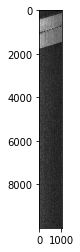

In [91]:
img = cv2.imread(os.path.join(lists[0], '0006508.jpg'))[:,:,::-1]
plt.imshow(img)

In [ ]:
img.shape

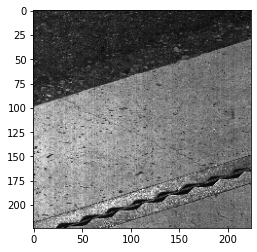

In [102]:
plt.imshow(x[0]/255.)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [93]:
boxes = [[0.0, 0.0, 0.1, 1.0],[0.1, 0.0, 0.2, 1.0],[0.2, 0.0, 0.3, 1.0],[0.3, 0.0, 0.4, 1.0],[0.4, 0.0, 0.5, 1.0],
         [0.5, 0.0, 0.6, 1.0],[0.6, 0.0, 0.7, 1.0],[0.7, 0.0, 0.8, 1.0],[0.8, 0.0, 0.9, 1.0],[0.9, 0.0, 1.0, 1.0]]
box_indices = [0,0,0,0,0,0,0,0,0,0]
crop_size = (224,224)
x = tf.image.crop_and_resize(img[np.newaxis,:,:,:], boxes, box_indices, crop_size)

In [94]:
x.shape

TensorShape([10, 224, 224, 3])

In [95]:
y = np.zeros((224*3,224, 3))

In [99]:
y = np.zeros((224*10,224,3))

for i in range(10):
    y[224*i:224*(i+1),:,:] = x[i]

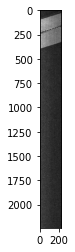

In [100]:
plt.imshow(y/255.)

In [36]:
y.shape

(448, 224)